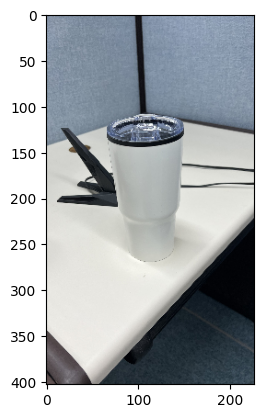

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

filepath = os.getcwd()

image1 = cv2.imread("./sample1.jpg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1 = cv2.resize(image1, dsize=(0,0), fx=0.1, fy=0.1)

plt.imshow(image1, cmap="gray")
plt.show()

In [11]:
def add_gaussian_noise(image, sigma, beta):
    # 가우시안 노이즈 추가
    noise = (np.random.normal(0, sigma, image.shape).astype('float64')) * 255
    noisy_image = image + beta * noise
    
    # 픽셀 값이 0~255 범위를 벗어나지 않도록 클리핑
    noisy_image = np.clip(noisy_image, 0, 255)
    
    return noisy_image


In [17]:
(np.random.normal(0, 1, 100).astype('float64'))

array([ 0.35498465, -1.20240584, -1.11663875,  0.10684463, -0.19204429,
        0.26204418,  0.31881032,  2.28299106,  0.6763117 , -0.86975878,
        0.97683372,  1.36449789,  0.57265063,  0.08062654, -1.11972474,
        1.215073  ,  1.52162119, -0.00642724,  0.07425938,  0.91044473,
        0.55829167, -0.262957  , -0.27464668, -0.37787634, -0.55706776,
        1.94114263,  0.89013758,  1.12762018, -1.62717462,  0.24288141,
       -0.89949267, -0.99834646, -0.43414393, -1.15350136, -1.35529519,
       -2.46069602, -1.59921975, -0.52235945,  1.23681116,  0.62230765,
        0.25848617,  0.02810428, -1.73722812, -0.56781309, -0.39389615,
       -1.21639615,  0.90590006,  0.2986117 , -0.39416797, -0.03964929,
       -1.19572692, -0.48246741, -1.36301053,  1.26571555,  1.3161119 ,
        0.04488692,  1.47328397, -0.02509132,  1.98307095,  1.55999766,
        0.94872567,  0.26718526,  0.94134555,  2.17847744, -0.56906972,
       -1.45331832, -0.4631924 , -1.46950174,  0.32405612, -1.24

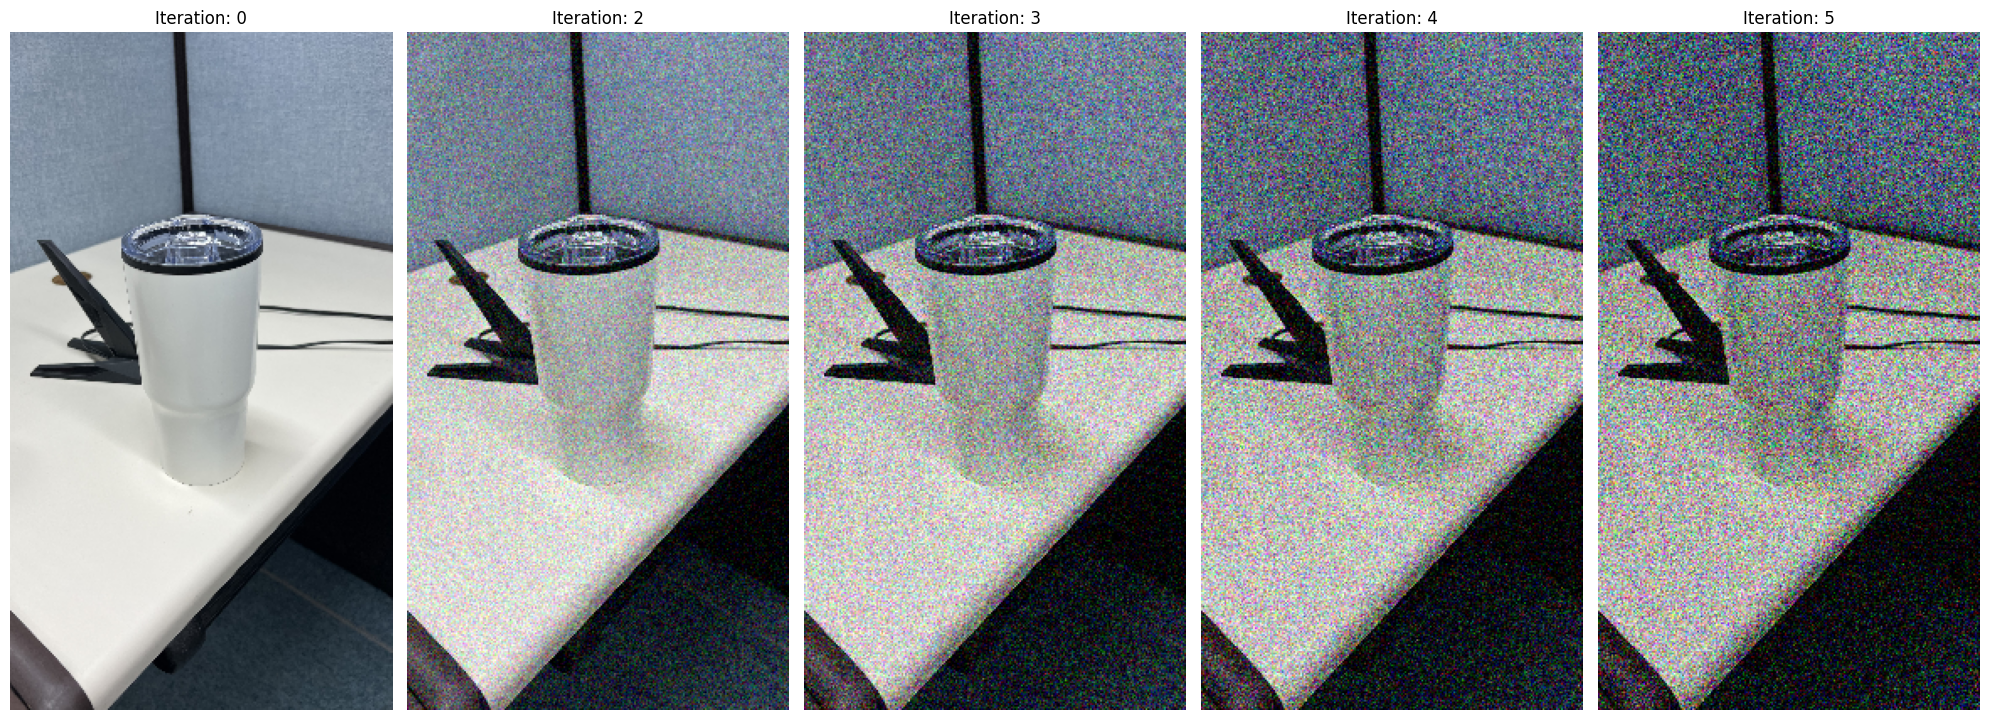

In [12]:
# 노이즈 추가 및 결과 표시
sigma = 1.0
beta = 0.1

noisy_image = image1.copy()

fig, axes = plt.subplots(1, 5, figsize=(20, 8))

axes[0].imshow(noisy_image.astype(np.uint8), cmap="gray")
axes[0].set_title(f'Iteration: {0}')
axes[0].axis('off')

for i in range(1,5):
    noisy_image = add_gaussian_noise(noisy_image, sigma, beta)
    axes[i%5].imshow(noisy_image.astype(np.uint8), cmap="gray")
    axes[i%5].set_title(f'Iteration: {i+1}')
    axes[i%5].axis('off')

plt.tight_layout()
plt.show()

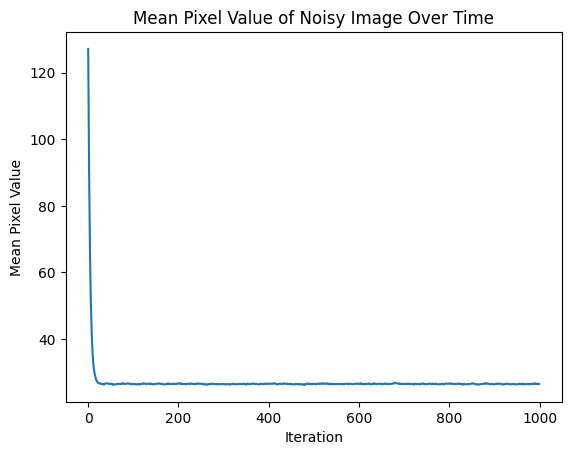

In [13]:
noisy_image = image1.copy()
mean_values = []

for i in range(1000):
    noisy_image = add_gaussian_noise(noisy_image, sigma, 0.2)
    mean_value = np.mean(noisy_image)
    mean_values.append(mean_value)

plt.plot(mean_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Pixel Value')
plt.title('Mean Pixel Value of Noisy Image Over Time')
plt.show()

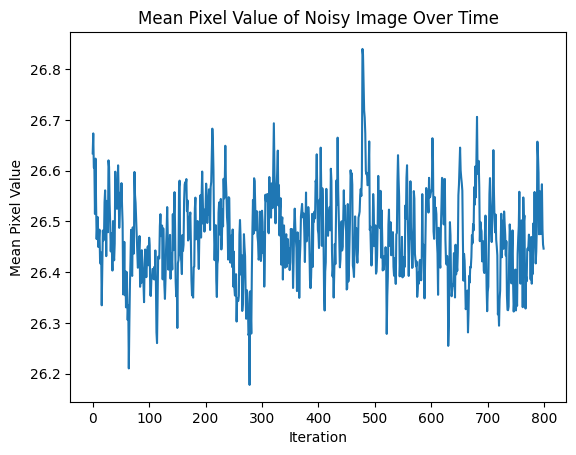

In [14]:
plt.plot(mean_values[200:])
plt.xlabel('Iteration')
plt.ylabel('Mean Pixel Value')
plt.title('Mean Pixel Value of Noisy Image Over Time')
plt.show()